In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerlifting-database/meets.csv
/kaggle/input/powerlifting-database/openpowerlifting.csv


In [61]:
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

kullanacağım kütüphanleri yükledim.

In [62]:
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/powerlifting-database/meets.csv")
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/powerlifting-database/openpowerlifting.csv")
df = df_.copy()

veri setimin yolunu ekledim.


In [63]:


import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
   
  
    df_missing = dataframe.copy()

    
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
  
    if seed:
        random.seed(seed)

    
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

veri setinde rastgele eksik veriler oluşturdum.

In [64]:

df.head(n = 5)




,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0.0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0.0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0.0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0.0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0.0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


veri setimin ilk 5 gözlemini gördüm.

In [65]:
df.shape 

(386414, 17)

veri setimde satır ve sütun sayısına baktım.

In [66]:

print(list(df.columns), '\n')


print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")


print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg', 'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'] 

Veri seti içerisinde toplam 17 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



Ardından veri setimde kolonlar ve kolonların toplam sayısına baktım ve hangi tipte veri döndürdüğünü gözden geçirdim.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          374954 non-null  float64
 1   Name            375041 non-null  object 
 2   Sex             374942 non-null  object 
 3   Equipment       374905 non-null  object 
 4   Age             142723 non-null  float64
 5   Division        359576 non-null  object 
 6   BodyweightKg    372834 non-null  float64
 7   WeightClassKg   371347 non-null  object 
 8   Squat4Kg        1213 non-null    float64
 9   BestSquatKg     289028 non-null  float64
 10  Bench4Kg        1914 non-null    float64
 11  BestBenchKg     345811 non-null  float64
 12  Deadlift4Kg     2727 non-null    float64
 13  BestDeadliftKg  308509 non-null  float64
 14  TotalKg         352599 non-null  float64
 15  Place           373870 non-null  object 
 16  Wilks           351396 non-null  float64
dtypes: float64

veri setimle ilgili bilgi aldım ve kolonlarda ne kadar eksik bilgi olduğunu gördüm.

In [68]:
df.dtypes

MeetID            float64
Name               object
Sex                object
Equipment          object
Age               float64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
dtype: object

veri tiplerimi gözden geçirdim.

In [69]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [70]:
categorical_features, numerical_features

(['Name', 'Sex', 'Equipment', 'Division', 'WeightClassKg', 'Place'],
 ['MeetID',
  'Age',
  'BodyweightKg',
  'Squat4Kg',
  'BestSquatKg',
  'Bench4Kg',
  'BestBenchKg',
  'Deadlift4Kg',
  'BestDeadliftKg',
  'TotalKg',
  'Wilks'])

In [71]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   MeetID          374954 non-null  float64 
 1   Name            375041 non-null  category
 2   Sex             374942 non-null  category
 3   Equipment       374905 non-null  category
 4   Age             142723 non-null  float64 
 5   Division        359576 non-null  category
 6   BodyweightKg    372834 non-null  float64 
 7   WeightClassKg   371347 non-null  category
 8   Squat4Kg        1213 non-null    float64 
 9   BestSquatKg     289028 non-null  float64 
 10  Bench4Kg        1914 non-null    float64 
 11  BestBenchKg     345811 non-null  float64 
 12  Deadlift4Kg     2727 non-null    float64 
 13  BestDeadliftKg  308509 non-null  float64 
 14  TotalKg         352599 non-null  float64 
 15  Place           373870 non-null  category
 16  Wilks           351396 non-null  float

In [73]:
df['BodyweightKg'][:3]

0    59.60
1    58.51
2    58.51
Name: BodyweightKg, dtype: float64

sütunumu  inceledim.

In [74]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
MeetID,374954.0,5143.451482,2551.872284,0.00,2981.00,5959.50,7175.00,8481.00
Age,142723.0,31.679204,12.916077,5.00,22.00,28.00,39.00,95.00
BodyweightKg,372834.0,86.944335,23.144363,15.88,70.30,83.20,100.00,242.40
Squat4Kg,1213.0,106.826315,167.400454,-440.50,88.45,145.00,212.50,450.00
BestSquatKg,289028.0,176.583857,69.212586,-477.50,127.50,174.63,217.72,573.79
Bench4Kg,1914.0,45.607090,151.841904,-360.00,-90.00,90.25,167.30,378.75
BestBenchKg,345811.0,118.354111,54.867006,-522.50,79.38,115.00,150.00,488.50
Deadlift4Kg,2727.0,113.439083,170.389886,-461.00,110.00,157.50,219.99,418.00
BestDeadliftKg,308509.0,195.004908,61.548971,-410.00,147.50,195.00,238.14,460.40
TotalKg,352599.0,423.965121,196.391659,11.00,272.16,424.11,565.00,1365.31


betimsel istatistiklerime ulaşmak için describe metodunu kullandım.

In [75]:
df.isna().sum()

eksik_degerler = df.isnull().sum()


toplam_kayit = len(df)


eksik_deger_orani = (eksik_degerler / toplam_kayit) * 100


print(eksik_deger_orani)



MeetID             2.965731
Name               2.943216
Sex                2.968837
Equipment          2.978412
Age               63.064744
Division           6.945401
BodyweightKg       3.514365
WeightClassKg      3.899186
Squat4Kg          99.686088
BestSquatKg       25.202503
Bench4Kg          99.504676
BestBenchKg       10.507642
Deadlift4Kg       99.294280
BestDeadliftKg    20.161019
TotalKg            8.750977
Place              3.246259
Wilks              9.062301
dtype: float64


eksik verilerime baktım ve Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu buldum.

In [76]:
df.notnull().sum()

MeetID            374954
Name              375041
Sex               374942
Equipment         374905
Age               142723
Division          359576
BodyweightKg      372834
WeightClassKg     371347
Squat4Kg            1213
BestSquatKg       289028
Bench4Kg            1914
BestBenchKg       345811
Deadlift4Kg         2727
BestDeadliftKg    308509
TotalKg           352599
Place             373870
Wilks             351396
dtype: int64

ardından eksik olmayanları ayırt ettim.

In [77]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 4773389 adet eksik olmayan, 1795649 eksik gözlem var.


In [78]:

df[df.isnull().any(axis = 1)]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0.0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0.0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0.0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0.0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0.0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481.0,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.50,347.50,2,202.60
386410,8481.0,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.50,322.50,3,185.77
386411,8481.0,Jake Anderson,M,Multi-ply,NaN,NaN,120.29,125,NaN,NaN,NaN,NaN,NaN,367.50,367.50,1,211.17
386412,8481.0,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.00,320.00,3,181.85


##en az bir tane eksik olanlar.

In [79]:

df[df.notnull().all(axis = 1)][:5]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
2074,44.0,Carol Moorhead,F,Wraps,55.0,Open,74.39,75,90.72,88.45,49.9,47.63,102.06,97.52,233.6,1,223.22
2574,59.0,Michael Megler,M,Single-ply,16.0,M_TES_2_WPC,73.40,75,167.50,165.00,102.5,100.00,205.00,200.00,465.0,1,336.43
2814,59.0,Nikolai Sokolov,M,Wraps,35.0,M_OR_WPC,75.00,75,250.00,240.00,-180.0,175.00,-307.50,300.00,715.0,1,509.48
4206,71.0,Botao Dai,M,Single-ply,15.0,M_TES_1_APF,54.60,56,77.50,67.50,55.0,47.50,107.50,105.00,220.0,1,205.36
4209,71.0,Nikhil Vashist,M,Single-ply,25.0,M_OES_APF,46.80,52,100.00,92.50,72.5,70.00,120.00,112.50,275.0,1,302.92


veri setimde hiç eksik olmayan kayıtlar.

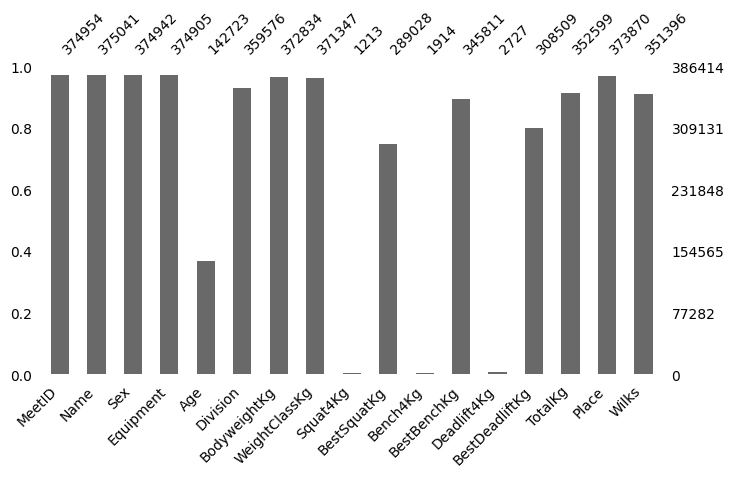

In [80]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

missinganko kutuphanesini ekledim.

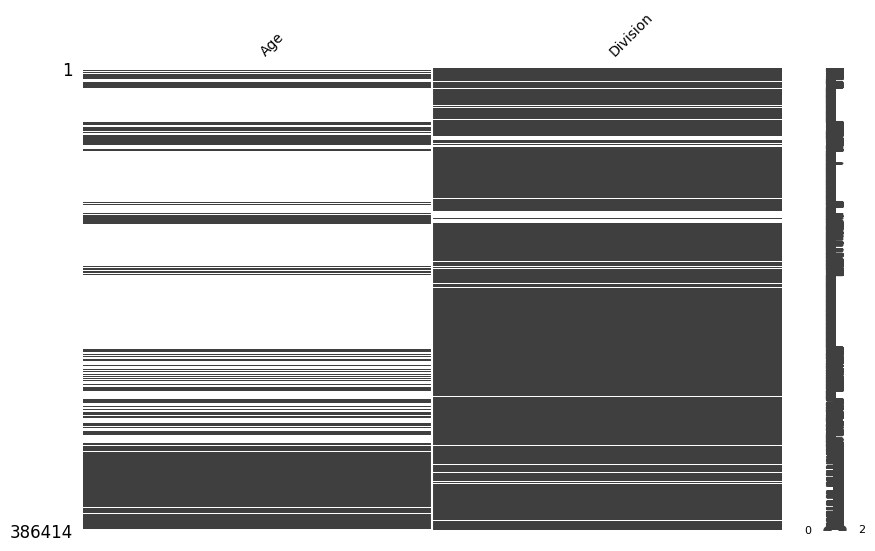

In [81]:

msno.matrix(df = df[['Age', 'Division']],
            figsize = (10, 6),
            fontsize = 10);

 msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit ettim.

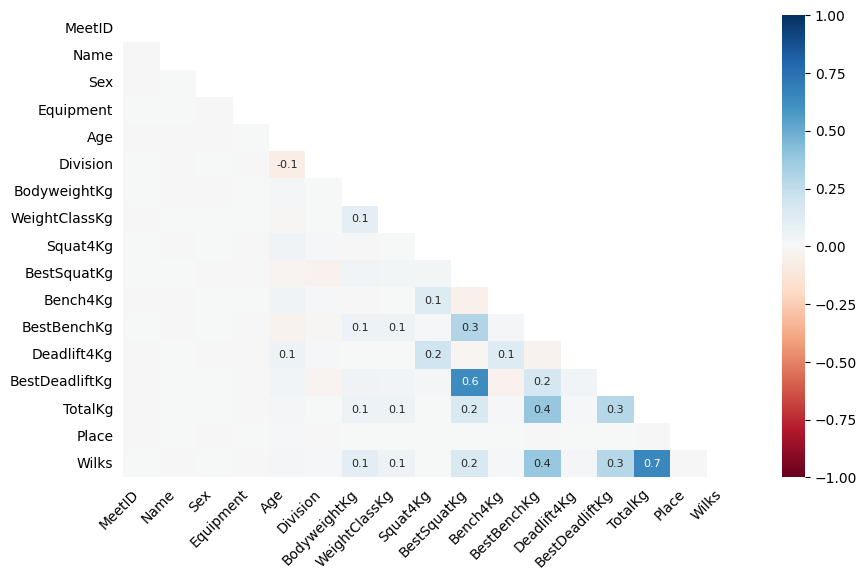

In [82]:
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

buradan 1 e yakın olanların ilişki ihtimallerinin yüksek 0 a yakın olanlarınında etkisi olmadığı bilgisini kullanarak verileri gözlemledim.

In [83]:


df.dropna(inplace = False)[:5]


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
2074,44.0,Carol Moorhead,F,Wraps,55.0,Open,74.39,75,90.72,88.45,49.9,47.63,102.06,97.52,233.6,1,223.22
2574,59.0,Michael Megler,M,Single-ply,16.0,M_TES_2_WPC,73.40,75,167.50,165.00,102.5,100.00,205.00,200.00,465.0,1,336.43
2814,59.0,Nikolai Sokolov,M,Wraps,35.0,M_OR_WPC,75.00,75,250.00,240.00,-180.0,175.00,-307.50,300.00,715.0,1,509.48
4206,71.0,Botao Dai,M,Single-ply,15.0,M_TES_1_APF,54.60,56,77.50,67.50,55.0,47.50,107.50,105.00,220.0,1,205.36
4209,71.0,Nikhil Vashist,M,Single-ply,25.0,M_OES_APF,46.80,52,100.00,92.50,72.5,70.00,120.00,112.50,275.0,1,302.92


eksik verilerimi sildim.

In [84]:
df.dropna(how = 'all')[:5]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0.0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0.0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0.0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0.0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0.0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


sonrasında sadece bütün değerleri eksik olanları silip gözlemledim.

In [85]:
df_fillna = df.copy()

df_fillna.head(3)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0.0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0.0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0.0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38


doldurma işlemini gerçekleştirmek için veri setimin kopyasını oluşturdum.

In [86]:
df_fillna.isna().sum()

MeetID             11460
Name               11373
Sex                11472
Equipment          11509
Age               243691
Division           26838
BodyweightKg       13580
WeightClassKg      15067
Squat4Kg          385201
BestSquatKg        97386
Bench4Kg          384500
BestBenchKg        40603
Deadlift4Kg       383687
BestDeadliftKg     77905
TotalKg            33815
Place              12544
Wilks              35018
dtype: int64

doldurma işlemine devam ettim.

In [87]:
# 'Age' sütununun ortalama değerini hesapladım.
mean_Age = df_fillna['Age'].mean()

# Ortalama değer ile 'Age' sütunundaki eksik değerleri doldurdum.
df_fillna['Age'] = df_fillna['Age'].fillna(value=mean_Age)

# Eksik NaN değerlerin sayısını kontrol ettim.
print(df_fillna.isna().sum())


MeetID             11460
Name               11373
Sex                11472
Equipment          11509
Age                    0
Division           26838
BodyweightKg       13580
WeightClassKg      15067
Squat4Kg          385201
BestSquatKg        97386
Bench4Kg          384500
BestBenchKg        40603
Deadlift4Kg       383687
BestDeadliftKg     77905
TotalKg            33815
Place              12544
Wilks              35018
dtype: int64


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MeetID,374954.0,5143.451482,2551.872284,0.00,2981.00,5959.50,7175.00,8481.00
Age,142723.0,31.679204,12.916077,5.00,22.00,28.00,39.00,95.00
BodyweightKg,372834.0,86.944335,23.144363,15.88,70.30,83.20,100.00,242.40
Squat4Kg,1213.0,106.826315,167.400454,-440.50,88.45,145.00,212.50,450.00
BestSquatKg,289028.0,176.583857,69.212586,-477.50,127.50,174.63,217.72,573.79
Bench4Kg,1914.0,45.607090,151.841904,-360.00,-90.00,90.25,167.30,378.75
BestBenchKg,345811.0,118.354111,54.867006,-522.50,79.38,115.00,150.00,488.50
Deadlift4Kg,2727.0,113.439083,170.389886,-461.00,110.00,157.50,219.99,418.00
BestDeadliftKg,308509.0,195.004908,61.548971,-410.00,147.50,195.00,238.14,460.40
TotalKg,352599.0,423.965121,196.391659,11.00,272.16,424.11,565.00,1365.31


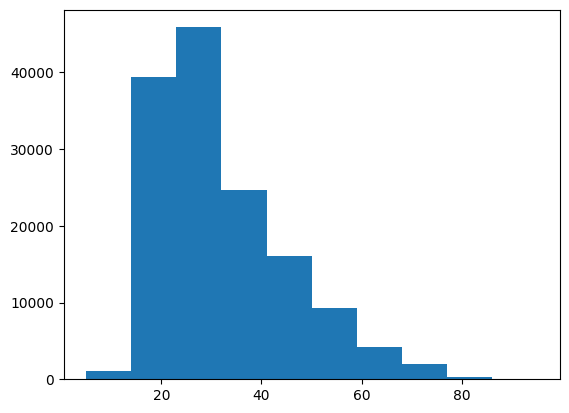

In [89]:

plt.hist(df['Age'])
plt.show()

 Bir sayısal değişkenin dağılımını görmek için histogram kullandım.

In [90]:
# 1. Kategorik değişkenlerin listesi
categorical_columns = df.select_dtypes(include=['object']).columns

# 2. Kategorik sütunlardaki benzersiz değerleri görüntüle
for col in categorical_columns:
    print(f'{col}: {df[col].unique()}')


Kategorik sütunlardaki benzersiz değerleri görüntüledim ve olmadığını fark ettim.

In [91]:
import pandas as pd

# Örnek veri seti (df) - kendi veri setinizi burada kullanabilirsiniz
# df = pd.read_csv('veri_seti.csv')

# Sayısal sütunları seçmek
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Sayısal sütunlar:", numerical_columns)

# Sayısal sütunlardaki eksik değerleri ortalama ile doldur
for col in numerical_columns:
    mean_value = df[col].mean()  # Her sütunun ortalamasını hesapla
    df[col] = df[col].fillna(mean_value)  # Eksik değerleri ortalama ile doldur

# Eksik (NaN) değerlerin sayısını kontrol et
print("Eksik değerler sonrası veri seti:")
print(df.isna().sum())



Sayısal sütunlar: Index(['MeetID', 'Age', 'BodyweightKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg',
       'BestBenchKg', 'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Wilks'],
      dtype='object')
Eksik değerler sonrası veri seti:
MeetID                0
Name              11373
Sex               11472
Equipment         11509
Age                   0
Division          26838
BodyweightKg          0
WeightClassKg     15067
Squat4Kg              0
BestSquatKg           0
Bench4Kg              0
BestBenchKg           0
Deadlift4Kg           0
BestDeadliftKg        0
TotalKg               0
Place             12544
Wilks                 0
dtype: int64


kategorik verilerim olmayınca sayısal verileri doldurdum.

In [92]:
df_fillna[["TotalKg"]][:20]

,TotalKg
0,138.35
1,401.42
2,401.42
3,95.25
4,122.47
5,392.36
6,383.28
7,383.28
8,283.49
9,108.86


bir tanesine baktım ve kontrol ettim.

In [93]:

df_fillna["TotalKg"].fillna(method = "bfill")

/tmp/ipykernel_30/2493893789.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["TotalKg"].fillna(method = "bfill")


0         138.35
1         401.42
2         401.42
3          95.25
4         122.47
           ...  
386409    347.50
386410    322.50
386411    367.50
386412    320.00
386413    362.50
Name: TotalKg, Length: 386414, dtype: float64

 Önceki değer ile doldurma işlemimini yaptım.

In [94]:

df_fillna["TotalKg"].fillna(method = "ffill")

/tmp/ipykernel_30/3678036057.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["TotalKg"].fillna(method = "ffill")


0         138.35
1         401.42
2         401.42
3          95.25
4         122.47
           ...  
386409    347.50
386410    322.50
386411    367.50
386412    320.00
386413    362.50
Name: TotalKg, Length: 386414, dtype: float64

In [95]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

MeetID                0
Name              11373
Sex               11472
Equipment         11509
Age                   0
Division          26838
BodyweightKg          0
WeightClassKg     15067
Squat4Kg              0
BestSquatKg           0
Bench4Kg              0
BestBenchKg           0
Deadlift4Kg           0
BestDeadliftKg        0
TotalKg               0
Place             12544
Wilks                 0
dtype: int64

In [96]:
df_categorical_fillna.isna().sum()

MeetID                0
Name              11373
Sex               11472
Equipment         11509
Age                   0
Division          26838
BodyweightKg          0
WeightClassKg     15067
Squat4Kg              0
BestSquatKg           0
Bench4Kg              0
BestBenchKg           0
Deadlift4Kg           0
BestDeadliftKg        0
TotalKg               0
Place             12544
Wilks                 0
dtype: int64

In [97]:

missing_data = df_categorical_fillna[df_categorical_fillna[['Age', 'TotalKg']].isna().all(axis=1)][['Age', 'TotalKg']]

r
print(missing_data)


NameError: name 'r' is not defined

In [ ]:
df = df_.copy()
df.info()

In [ ]:

df_fillna['WeightClassKg'].isna().sum()


WeightClassKg_mode = df_fillna['WeightClassKg'].mode()


df_fillna['WeightClassKg'] = df_fillna['WeightClassKg'].fillna(value = WeightClassKg_mode[0])

df_fillna.isna().sum()

mode değeri ile doldurdum WeightClassKg yi.

In [ ]:
df_fillna[["WeightClassKg"]][:20]

In [ ]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(4)

kategorik verilere baktım.

In [ ]:
df_categorical["Division"].unique()

division'u inceledim.

In [ ]:
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

kategorik değişkenlerin sayısını inceledim.

In [ ]:
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

kategorik değişkenler için toplam gözlem sayılarını inceledim.

In [ ]:
a_categories = df["Division"].unique().tolist()[::-1]
a_categories

In [ ]:
from pandas.api.types import CategoricalDtype



df["Division"] = df["Division"].astype(CategoricalDtype(categories = a_categories, ordered = True))

ordinal değer oluşturdum.

In [ ]:
df["Division"].head()

In [ ]:
df['Division'].value_counts().plot.barh();

kategorik veriyi görselleştirdim.

In [ ]:
import pandas as pd

# Dosya yollarını kendi dosyanıza göre değiştirin
df1 = pd.read_csv('/kaggle/input/powerlifting-database/meets.csv')  # İlk dosyanın yolu
df2 = pd.read_csv('/kaggle/input/powerlifting-database/openpowerlifting.csv')  # İkinci dosyanın yolu

# İlk 5 satırı kontrol edelim
print(df1.head())
print(df2.head())

In [ ]:
import pandas as pd

# Dosya yolunu doğru belirttiğinizden emin olun
df = pd.read_csv('/kaggle/input/powerlifting-database/openpowerlifting.csv')

# Yüklenen veri çerçevesinin ilk 5 satırını kontrol edelim
print(df.head())


In [ ]:

df_numerical = df.select_dtypes(include = ["float64", "int64"])


print(df_numerical.head())


 Veri çerçevesini yükledikten sonra işlemi gerçekleştirdim ve il 5 satırı kontrol ettim.

In [ ]:
df.head() 

In [ ]:
df_numerical.describe().T

In [ ]:
def give_stats(dataframe: pd.DataFrame) -> None:
   

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")
give_stats(df)  # Burada df, üzerinde işlem yapmak istediğiniz DataFrame'dir.


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns


In [ ]:
iris = sns.load_dataset(name="iris")
iris.head(3) 

ardında irisi tanımladım ve ilk üç veriye baktım.

In [ ]:
df.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (8, 6))


sns.boxplot(data = df, 
            y = df["TotalKg"], 
            orient = "v")

plt.show()


 Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirdim.

In [ ]:
df_TotalKg = df['TotalKg']
df_TotalKg

In [ ]:

Q1 = df_TotalKg.quantile(0.25)
Q3 = df_TotalKg.quantile(0.75)


print(Q1)
print(Q3)


IQR = Q3-Q1
print(IQR)


lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

Quantile değerlerin belirlenmesi.IQR değerin belirlenmesi.Alt ve üst sınırların belirlenmesi.

In [ ]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_TotalKg[df_TotalKg > upper_fence].index

outlier_idx

Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tuttum.

In [ ]:
df_TotalKg[df_TotalKg > upper_fence]

In [ ]:
df_del = df[~(df_TotalKg > upper_fence)]

df_del

aykırı gözlemleri sildim.

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["TotalKg"],
            orient = "v");

In [ ]:

print(df.describe())


 analizlerin sonuçları.